**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Rodrigo González Rodríguez
*   MATRÍCULA: A01796932


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
air_df = pd.read_csv('/content/drive/MyDrive/MNA/01 - Ciencia y analítica de datos/2.2 - Análisis de datos con pandas/LaqnData.csv')

1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)

<font color="#E8710A">Tenemos un dataframe de 43,800 registros(filas), y 6 atributos(columnas).</font>

<font color="#E8710A">Sus atributos son : Sitio, Especie, Fecha y hora de lectura, Valor, Unidades y Provisional o Ratificado.</font>

<font color="#E8710A">Todos sus atributos son de tipo Object, a excepcion de "Value"</font>

*   Calcula el porcentaje de valores faltantes por columna.

<font color="#E8710A">Solo falta el 7.37% de los valores en la columna "Value"</font>


In [3]:
print(f"Shape (rows & columns): {air_df.shape} \n")
print(f"Columns Names: {', '.join(air_df.columns)} \n")
print(f"Top row (Head): \n {air_df.head(1)} \n")
print(f"Bottom row (Tail): \n {air_df.tail(1)} \n")
print(f"Column Data Type: \n {air_df.dtypes} \n")
total_columns = air_df.shape[0]
percentage = (air_df.isna().sum() / total_columns) * 100
print(f"Missing Percentage per column: \n{percentage.round(2)}")

Shape (rows & columns): (43800, 6) 

Columns Names: Site, Species, ReadingDateTime, Value, Units, Provisional or Ratified 

Top row (Head): 
   Site Species   ReadingDateTime  Value   Units Provisional or Ratified
0  CT3      NO  01/01/2017 00:00    3.5  ug m-3                       R 

Bottom row (Tail): 
       Site Species   ReadingDateTime  Value   Units Provisional or Ratified
43799  CT3   PM2.5  31/12/2017 23:00    6.0  ug m-3                       R 

Column Data Type: 
 Site                        object
Species                     object
ReadingDateTime             object
Value                      float64
Units                       object
Provisional or Ratified     object
dtype: object 

Missing Percentage per column: 
Site                       0.00
Species                    0.00
ReadingDateTime            0.00
Value                      7.37
Units                      0.00
Provisional or Ratified    0.00
dtype: float64


2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?

<font color="#E8710A">43,800 mediciones.</font>
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?

<font color="#E8710A">5 Contaminantes (NO, NO2, NOX, PM10, PM2.5).</font>
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.

<font color="#E8710A">"Site" y "Provisional or Ratified".</font>
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

<font color="#E8710A">Correcto, tiene tres valores que se podrian unificar ('ug m-3', 'ug m-3 as NO2', 'ug/m3')</font>

In [4]:
unique_values_per_column = air_df.nunique()
print(f"Unique values per column: \n {unique_values_per_column} \n")
print(f"Total: {air_df.shape[0]} \n")
print(f"Number of Species analyzed: {air_df['Species'].nunique()}")
print(f"Name of Species analyzed: {air_df['Species'].unique()}")
#Filtramos todas aquellas que tienen un solo valor unico en todas las filas
filter_unique_values = unique_values_per_column[unique_values_per_column == 1]
print(f"No Informative Columns : {filter_unique_values.index.tolist()}")
air_df = air_df.drop(columns=filter_unique_values.index.tolist())

print(f"DataFrame w/o Non Informative Columns: {air_df.shape}")

print(f"Values in column 'Units': {air_df['Units'].unique()}")
air_df = air_df.drop(columns=['Units'])

Unique values per column: 
 Site                          1
Species                       5
ReadingDateTime            8760
Value                      1847
Units                         3
Provisional or Ratified       1
dtype: int64 

Total: 43800 

Number of Species analyzed: 5
Name of Species analyzed: ['NO' 'NO2' 'NOX' 'PM10' 'PM2.5']
No Informative Columns : ['Site', 'Provisional or Ratified']
DataFrame w/o Non Informative Columns: (43800, 4)
Values in column 'Units': ['ug m-3' 'ug m-3 as NO2' 'ug/m3']


3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

<font color="#E8710A">Correcto, la suma de contaminantes es igual al total de registos</font>

In [5]:
print(f"Total number of values in column 'Species': {air_df['Species'].value_counts().sum()}")
print(f"Total number of rows: {len(air_df)}")
result = "Species values = Total rows" if air_df['Species'].value_counts().sum() == len(air_df) else "Species values != Total rows"
print(result)

Total number of values in column 'Species': 43800
Total number of rows: 43800
Species values = Total rows


4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

<font color="#E8710A">Valor promedio de NO = 15</font>

<font color="#E8710A">Valor promedio de NO2 = 38</font>

<font color="#E8710A">Valor promedio de NOX = 61</font>

<font color="#E8710A">Valor promedio de PM10 = 22.5</font>

<font color="#E8710A">Valor promedio de PM2.5 = 15</font>

In [6]:
print(f"Average Value per Specie: \n {air_df.groupby('Species')['Value'].mean()}")

Average Value per Specie: 
 Species
NO       15.045115
NO2      38.010185
NOX      61.078661
PM10     22.551704
PM2.5    14.999831
Name: Value, dtype: float64


5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [7]:
pvt_df = air_df.pivot(index='ReadingDateTime', columns='Species', values='Value')

6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?

<font color="#E8710A">El valor maximo de NO2 fue 120.2, el dia 24 de enero de 2017</font>
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?

<font color="#E8710A">El valor minimo registrado de PM10 fue de -5.6, el 12 de septiembre de 2017</font>
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?

<font color="#E8710A">La mediana de NO fue 7.1, lo cual significa que es el valor en el centro de la muestra, el 50 % esta por debajo y el otro 50% esta por encima de este valor</font>
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

<font color="#E8710A">El primer cuartil es 7, y nos dice que una cuarta parte de los datos estan por debajo de este valor. En conjunto con la mediana, sabemos que un 25% de los datos se encuentra entre 7 y 7.1</font>

In [8]:
pvt_df_described = pvt_df.describe()
print(f"Max NO2 value registered: {pvt_df_described['NO2']['max']}")
print(f"List of dates where Max NO2 was registered: {pvt_df[pvt_df['NO2'] == pvt_df_described['NO2']['max']].index.tolist()}")
print(f"Min PM10 value registered: {pvt_df_described['PM10']['min']}")
print(f"List of dates where Min PM10 was registered: {pvt_df[pvt_df['PM10'] == pvt_df_described['PM10']['min']].index.tolist()}")
print(f"Median value of NO: {pvt_df_described['NO']['50%']}")
print(f"First Quartil of PM2.5: {pvt_df_described['PM2.5']['25%']}")

Max NO2 value registered: 120.2
List of dates where Max NO2 was registered: ['24/01/2017 19:00']
Min PM10 value registered: -5.6
List of dates where Min PM10 was registered: ['12/09/2017 23:00']
Median value of NO: 7.1
First Quartil of PM2.5: 7.0


7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

<font color="#E8710A">Usando desviacion estandar, el contaminante con mayor variabilidad es NOX</font>

Species Variability : Species
NO       26.678565
NO2      18.580841
NOX      54.584805
PM10     15.344755
PM2.5    13.558588
dtype: float64
Specie with more variability : NOX


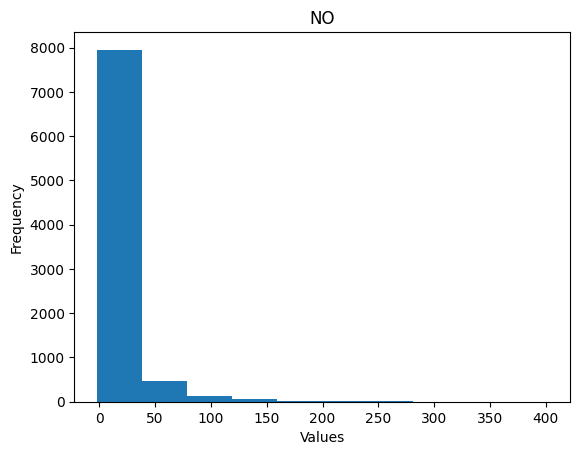

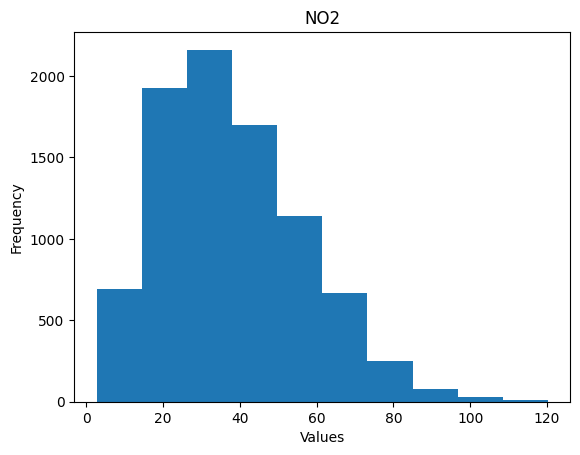

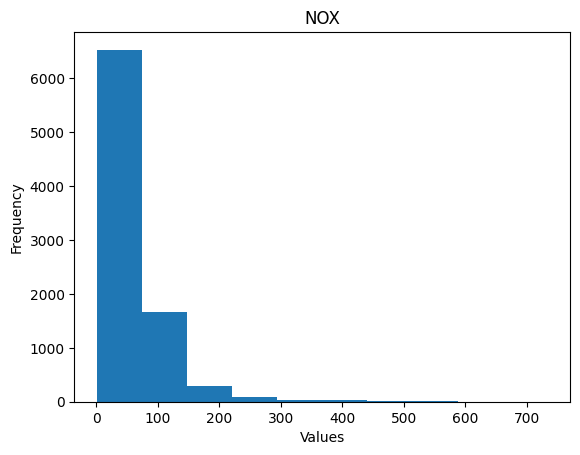

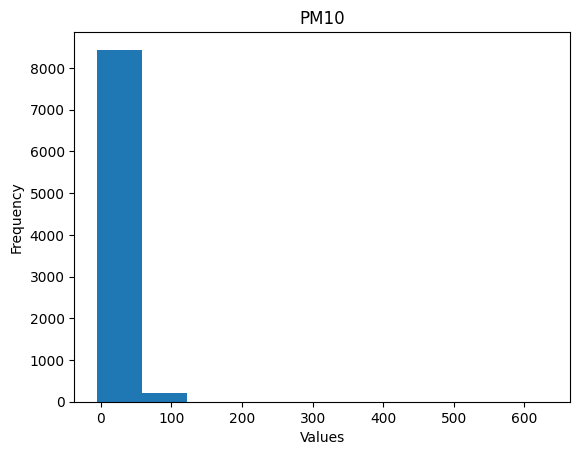

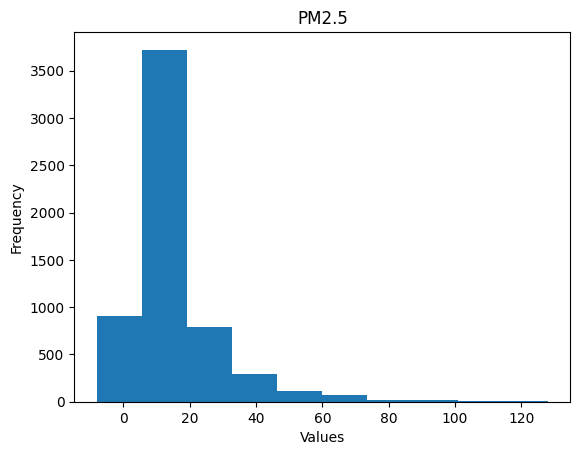

In [9]:
print(f"Species Variability : {pvt_df.std()}")
print(f"Specie with more variability : {pvt_df.std().idxmax()}")
for column in pvt_df.columns:
    plt.hist(pvt_df[column])
    plt.title(column)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

<font color="#E8710A">1 - Crea un dataframe que divide ReadingDateTime usando espacios como separadores</font>

<font color="#E8710A">2 - Nombra las columnas resultantes como 'Date' y 'Time'</font>

<font color="#E8710A">3 - Muestra el contenido de DF (datetime_df)</font>

<font color="#E8710A">4 - Crea un DF que divide la columna "Date" usand "/" como criterio de separacion</font>

<font color="#E8710A">5 - Nombra las columnas como 'Day', 'Month', y 'Year'</font>

<font color="#E8710A">6 - Muestra el contenido del DF (date_df)</font>

<font color="#E8710A">7 - Agrega al DF original (air_df) los DF creados previamente y elimina las columnas ReadingDateTime y Year
</font>

<font color="#E8710A">8 - Indexamos las columnas 'Month', 'Day', 'Time', y 'Species' en una sola
</font>

<font color="#E8710A">9 - Muestra el DF final (air_df)
</font>

In [10]:
# Crea un dataframe que divide ReadingDateTime usando espacios como separadores
datetime_df = air_df.ReadingDateTime.str.split(' ', expand=True)
# Nombra las columnas resultantes como 'Date' y 'Time'
datetime_df.columns = ['Date', 'Time']
# Muestra el contenido de DF
datetime_df
# Crea un DF que divide la columna "Date" usand "/" como criterio de separacion
date_df = datetime_df.Date.str.split('/', expand=True)
# Nombra las columnas como 'Day', 'Month', y 'Year'
date_df.columns = ['Day', 'Month', 'Year']
# Muestra el contenido
date_df
# Agrega al DF original (air_df) los DF creados previamente y elimina las columnas ReadingDateTime y Year
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime', 'Year'])
# Indexamos las columnas 'Month', 'Day', 'Time', y 'Species' en una sola
air_df = air_df.set_index(['Month', 'Day', 'Time', 'Species'])
# Muestra el DF final
air_df

Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

<font color="#E8710A">la funcion "unstack" convirtio a formato ancho, entonces su mayor diferencia seria esa, que el DF anterior estaba en formato largo.
</font>

In [11]:
air_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

<font color="#E8710A">Similitudes : Por un lado, "melt" y "stack" convierten de ancho a largo (convertir columnas a filas), mientras que "pivot" y "unstack" convierten de largo a ancho (Convertir filas a columnas).
</font>

<font color="#E8710A">Diferencias : "melt/pivot" seria una conversion simple y rapida, mientras que "stack/unstack" es una conversion avanzada al ser necesario trabajar con indices.
</font>

<font color="#E8710A">"stack" seria la contraparte de "melt", porque convierten de ancho a largo.
</font>